In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']
import RPDM

In [8]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 293
A_k = 10**(-8)
A_D = 10**(-20)
A_L = 10**(-10)

an = 0.1
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 0.5
d_cdl = 1
D_MV = 1
D_OV = 1
k1_0 = 5 * 100   # reactive
k2_0 = 7
k3_0 = 5
k4_0 = 5 * 100   # reactive
k5_0 = 7.5 * 100

A_C = A_k*A_L/A_D
A_t = A_L**2/A_D
A_phi = R*Temp/Ff
phi_ext = 1.5/A_phi

L = 29.0
T = 20
Nx = 501
n_save = 40

h = L / (Nx-1)
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)

501 23783 596


In [3]:
F = RPDM.Film()

F.Nx = Nx
F.n_save = n_save
F.phi_ext = phi_ext
F.L = L
F.T = T
F.D_MV = D_MV
F.D_OV = D_OV
F.k1_0 = k1_0
F.k2_0 = k2_0
F.k3_0 = k3_0
F.k4_0 = k4_0
F.k5_0 = k5_0
F.an = an
F.e_f = e_f
F.e_dl = e_dl
F.e_cdl = e_cdl
F.d_dl = d_dl
F.d_cdl = d_cdl
F.Temp = Temp
F.Ff = Ff
F.e_0 = e_0
F.R = R
F.A_k = A_k
F.A_D = A_D
F.A_L = A_L

F.start()

0

In [10]:
F.solve()

0

In [5]:
F.save_x(b".")
F.save_t(b".")
F.save_C_MV(b".")
F.save_C_OV(b".")
F.save_phi(b".")
F.save_E(b".")
F.save_k2(b".")

In [6]:
F.h

0.058

In [6]:
path = '.'

x = np.loadtxt(path+'/x.txt')
t_data = np.loadtxt(path+'/t_data.txt')
Data_C_MV = np.loadtxt(path+'/Data_C_MV.txt')
Data_C_OV = np.loadtxt(path+'/Data_C_OV.txt')
Data_phi = np.loadtxt(path+'/Data_phi.txt')
Data_E = np.loadtxt(path+'/Data_E.txt')
Data_k2 = np.loadtxt(path+'/Data_k2.txt')

# Visualisation

## General

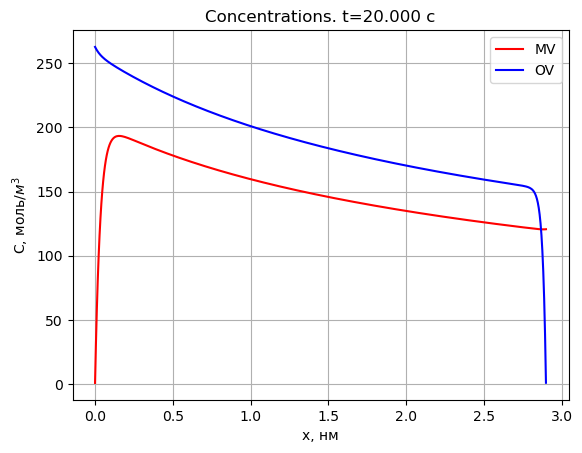

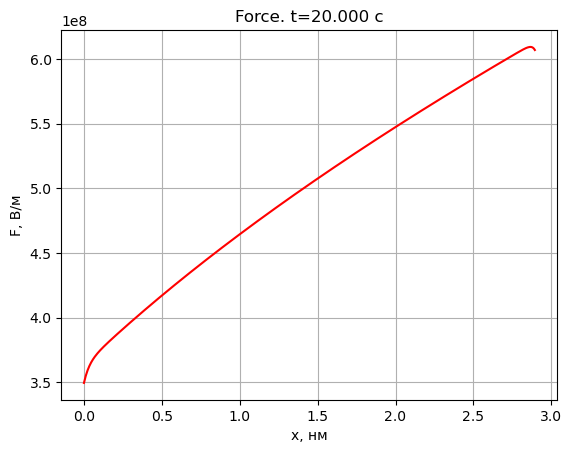

In [11]:
num = -1
plt.plot(x*0.1, Data_C_MV[num]*A_C, 'r', label='MV')
plt.plot(x*0.1, Data_C_OV[num]*A_C, 'b', label='OV')
plt.title(f'Concentrations. t={t_data[num]*A_t:.3f} c')
plt.legend()
plt.xlabel('x, нм')
plt.ylabel(r'C, моль/$м^{3}$')
plt.grid()
#plt.savefig(path+f'C({t[num]:.3f}).png', format='png', dpi=300)
plt.show()

plt.plot(x[:-1]*0.1, A_phi/A_L*Data_E[num], 'r', label='F')
plt.title(f'Force. t={t_data[num]*A_t:.3f} c')
plt.xlabel('x, нм')
plt.ylabel('F, В/м')
#plt.ylim([A_phi/A_L*F_min*0.95, A_phi/A_L*F_max*1.05])
plt.grid()
#plt.savefig(path+f'F({t[num]:.3f}).png', format='png', dpi=300)
plt.show()